<a href="https://colab.research.google.com/github/yingzibu/drug_design_JAK/blob/main/drug_property_QED_SA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/gdrive/')
import sys
sys.path.append('/content/gdrive/MyDrive/Drug_design')

Mounted at /content/gdrive/


In [2]:
cd /content/gdrive/MyDrive/Drug_design

/content/gdrive/MyDrive/Drug_design


In [3]:
import package_setup

['absl-py', 'aiohttp', 'aiosignal', 'alabaster', 'albumentations', 'altair', 'anyio', 'appdirs', 'argon2-cffi', 'argon2-cffi-bindings', 'array-record', 'arviz', 'astropy', 'astunparse', 'async-timeout', 'attrs', 'audioread', 'autograd', 'Babel', 'backcall', 'beautifulsoup4', 'bleach', 'blis', 'blosc2', 'bokeh', 'branca', 'build', 'CacheControl', 'cached-property', 'cachetools', 'catalogue', 'certifi', 'cffi', 'chardet', 'charset-normalizer', 'chex', 'click', 'click-plugins', 'cligj', 'cloudpickle', 'cmake', 'cmdstanpy', 'colorcet', 'colorlover', 'community', 'confection', 'cons', 'contextlib2', 'contourpy', 'convertdate', 'cufflinks', 'cvxopt', 'cvxpy', 'cycler', 'cymem', 'Cython', 'dask', 'datascience', 'db-dtypes', 'dbus-python', 'debugpy', 'decorator', 'defusedxml', 'distributed', 'dlib', 'dm-tree', 'docutils', 'dopamine-rl', 'duckdb', 'earthengine-api', 'easydict', 'ecos', 'editdistance', 'en-core-web-sm', '@', 'https://github.com/explosion/spacy-models/releases/download/en_core_we

In [4]:
import rdkit
import operator
import os
from rdkit import Chem
from rdkit.Chem import QED
import seaborn as sns
import pandas as pd
import numpy as np

In [ ]:
from tqdm import tqdm
data_drugs = pd.read_csv('drugs_chembl.csv', sep=';')
data_drugs.head()
qed_list = []
smi_list = []
nan_smi = 0
properties = []
for s in tqdm(data_drugs.Smiles):
    # print(s)
    try:
        mol = Chem.MolFromSmiles(s)
        prop = QED.properties(mol)
        properties.append(prop)
        qed = QED.qed(mol)
        qed_list.append(qed)
        smi_list.append(s)
    except:
        nan_smi += 1
print('Nan smiles #', nan_smi)  # 3733 nan smiles
print(len(smi_list))   # 10560 smiles are valid
print(len(data_drugs)) # 14293
        # print('wrong smiles')
        # print(s)

[21:40:06] WARNING: not removing hydrogen atom without neighbors
[21:40:06] WARNING: not removing hydrogen atom without neighbors
[21:40:06] WARNING: not removing hydrogen atom without neighbors
[21:40:06] WARNING: not removing hydrogen atom without neighbors
[21:40:06] WARNING: not removing hydrogen atom without neighbors
[21:40:06] WARNING: not removing hydrogen atom without neighbors
[21:40:06] WARNING: not removing hydrogen atom without neighbors
[21:40:06] WARNING: not removing hydrogen atom without neighbors
[21:40:06] WARNING: not removing hydrogen atom without neighbors


/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


[Text(0.5, 1.0, 'Drug-likeness (QED)')]

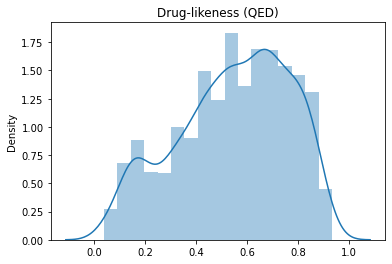

In [ ]:

data_fda = pd.read_csv('fda.csv')
# data_fda.head()
qed_list = [QED.qed(Chem.MolFromSmiles(s)) for s in data_fda.smiles]
properties = [QED.properties(Chem.MolFromSmiles(s)) for s in data_fda.smiles]
dic = {data_fda.smiles[i]: qed_list[i] for i in range(len(qed_list))}
sorted_dict = dict(sorted(dic.items(),
                          key=operator.itemgetter(1), reverse=True))
sns.distplot(list(sorted_dict.values())).set(title='Drug-likeness (QED)')
# sorted_dict.values()

In [ ]:
len(properties)

1615

In [ ]:
import inspect
def autodict(*args):
    get_rid_of = ['autodict(', ',', ')', '\n']
    calling_code = inspect.getouterframes(inspect.currentframe())[1][4][0]
    calling_code = calling_code[calling_code.index('autodict'):]
    for garbage in get_rid_of:
        calling_code = calling_code.replace(garbage, '')
    var_names, var_values = calling_code.split(), args
    dyn_dict = {var_name: var_value for var_name, var_value in
                zip(var_names, var_values)}
    return dyn_dict
def init_params():

    MWs = []
    ALOGPs = []
    HBDs = []
    HBAs = []
    PSAs = []
    ROTBs = []
    AROMs = []
    ALERTSs = []
    parameters = autodict(MWs, ALOGPs, HBDs, HBAs, PSAs, ROTBs, AROMs, ALERTSs)
    return parameters
parameters = init_params()

In [ ]:
for i in range(len(properties)):
    for params in ['MW', 'ALOGP', 'HBD', 'HBA', 'PSA', 'ROTB', 'AROM', 'ALERTS']:

        p = eval('properties[i].'+params)
        keys = params + 's'
        parameters[keys].append(p)


In [ ]:
for i in parameters.keys():
    sns.displot(parameters[i]).set(title=i)

for  QED
for  SA
for  MWs
for  ALOGPs
for  HBDs


/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

for  HBAs
for  PSAs
for  ROTBs
for  AROMs
for  ALERTSs


/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

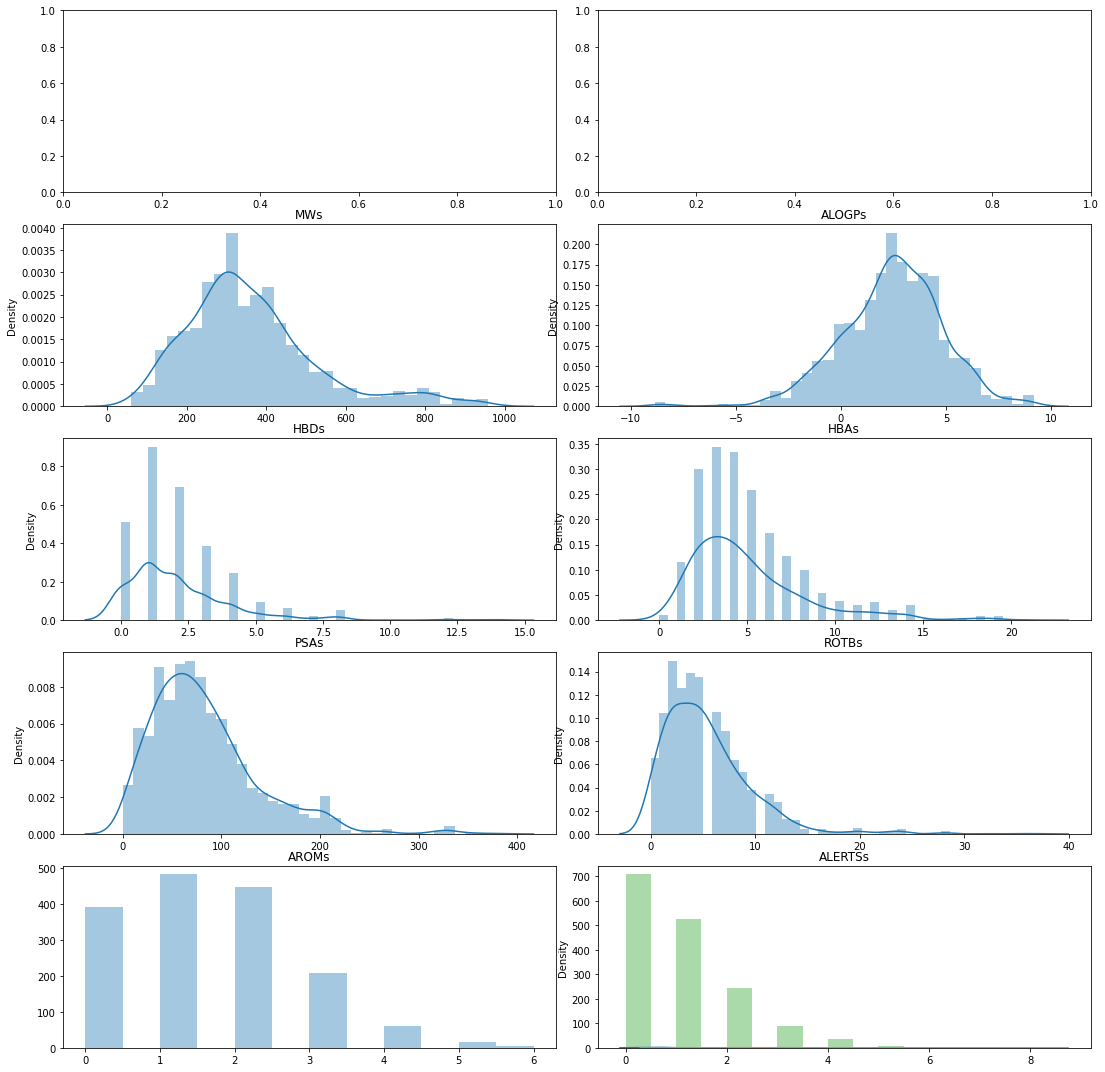

In [ ]:
l =
l

['MWs',
 'ALOGPs',
 'HBDs',
 'HBAs',
 'PSAs',
 'ROTBs',
 'AROMs',
 'ALERTSs',
 'QED',
 'SA']

In [ ]:
# https://github.com/rdkit/rdkit/tree/master/Contrib/SA_Score
# Estimation of Synthetic Accessibility Score of Drug-like Molecules based on Molecular Complexity and Fragment Contributions
# Peter Ertl and Ansgar Schuffenhauer
# Journal of Cheminformatics 1:8 (2009)
# http://www.jcheminf.com/content/1/1/8

from rdkit import Chem
from rdkit.Chem import rdMolDescriptors
import pickle

import math
from collections import defaultdict

import os.path as op

_fscores = None


def readFragmentScores(name='fpscores'):
    import gzip
    global _fscores
    # generate the full path filename:
    if name == "fpscores":
        name = op.join('SA_Score/', name)
    data = pickle.load(gzip.open('%s.pkl.gz' % name))
    outDict = {}
    for i in data:
        for j in range(1, len(i)):
            outDict[i[j]] = float(i[0])
    _fscores = outDict


def numBridgeheadsAndSpiro(mol, ri=None):
    nSpiro = rdMolDescriptors.CalcNumSpiroAtoms(mol)
    nBridgehead = rdMolDescriptors.CalcNumBridgeheadAtoms(mol)
    return nBridgehead, nSpiro


def calculateScore(m):
    if _fscores is None:
        readFragmentScores()

    # fragment score
    fp = rdMolDescriptors.GetMorganFingerprint(m,
                                               2)  # <- 2 is the *radius* of the circular fingerprint
    fps = fp.GetNonzeroElements()
    score1 = 0.
    nf = 0
    for bitId, v in fps.items():
        nf += v
        sfp = bitId
        score1 += _fscores.get(sfp, -4) * v
    score1 /= nf

    # features score
    nAtoms = m.GetNumAtoms()
    nChiralCenters = len(Chem.FindMolChiralCenters(m, includeUnassigned=True))
    ri = m.GetRingInfo()
    nBridgeheads, nSpiro = numBridgeheadsAndSpiro(m, ri)
    nMacrocycles = 0
    for x in ri.AtomRings():
        if len(x) > 8:
            nMacrocycles += 1

    sizePenalty = nAtoms**1.005 - nAtoms
    stereoPenalty = math.log10(nChiralCenters + 1)
    spiroPenalty = math.log10(nSpiro + 1)
    bridgePenalty = math.log10(nBridgeheads + 1)
    macrocyclePenalty = 0.
    # ---------------------------------------
    # This differs from the paper, which defines:
    #  macrocyclePenalty = math.log10(nMacrocycles+1)
    # This form generates better results when 2 or more macrocycles are present
    if nMacrocycles > 0:
        macrocyclePenalty = math.log10(2)

    score2 = 0. - sizePenalty - stereoPenalty - spiroPenalty - bridgePenalty - macrocyclePenalty

    # correction for the fingerprint density
    # not in the original publication, added in version 1.1
    # to make highly symmetrical molecules easier to synthetise
    score3 = 0.
    if nAtoms > len(fps):
        score3 = math.log(float(nAtoms) / len(fps)) * .5

    sascore = score1 + score2 + score3

    # need to transform "raw" value into scale between 1 and 10
    min = -4.0
    max = 2.5
    sascore = 11. - (sascore - min + 1) / (max - min) * 9.
    # smooth the 10-end
    if sascore > 8.:
        sascore = 8. + math.log(sascore + 1. - 9.)
    if sascore > 10.:
        sascore = 10.0
    elif sascore < 1.:
        sascore = 1.0

    return sascore


def processMols(mols):
    # print('smiles\tName\tsa_score')
    sa_scores = []
    for m in mols:
        if m is None:
            continue

        s = calculateScore(m)

        smiles = Chem.MolToSmiles(m)
        # print( "\t%3f" % s)
        sa_scores.append(s)
    return sa_scores



if __name__ == '__main__':
    import sys
    import time

    t1 = time.time()
    readFragmentScores("fpscores")
    t2 = time.time()

    mols = [Chem.MolFromSmiles(smi) for smi in data_fda.smiles]
    t3 = time.time()
    scores = processMols(mols)
    t4 = time.time()

    print('Reading took %.2f seconds. Calculating took %.2f seconds' % ((t2 - t1), (t4 - t3)),
          file=sys.stderr)

#
#  Copyright (c) 2013, Novartis Institutes for BioMedical Research Inc.
#  All rights reserved.
#
# Redistribution and use in source and binary forms, with or without
# modification, are permitted provided that the following conditions are
# met:
#
#     * Redistributions of source code must retain the above copyright
#       notice, this list of conditions and the following disclaimer.

Reading took 0.72 seconds. Calculating took 1.50 seconds


In [ ]:
import os.path

dirname = os.path.dirname('Drug_design') or '.'

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


[Text(0.5, 1.0, 'SA')]

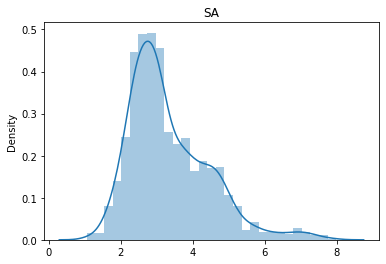

In [ ]:
sns.distplot(scores).set(title='SA')

for  QED
for  SA
for  MWs
for  ALOGPs


/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

for  HBDs
for  HBAs
for  PSAs
for  ROTBs


/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

for  AROMs
for  ALERTSs


/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


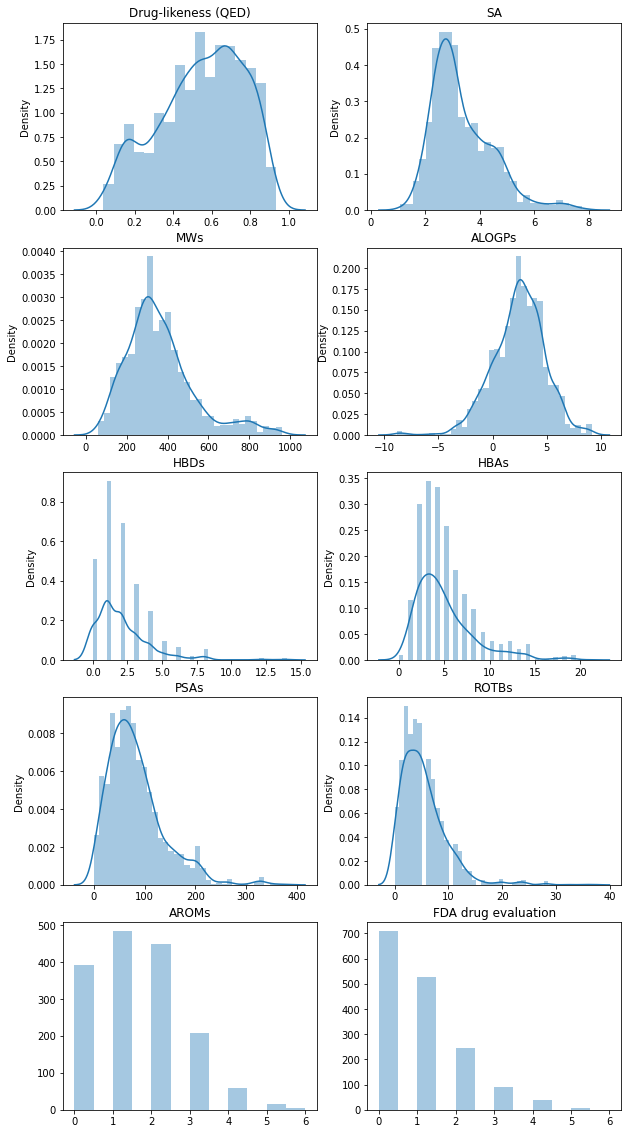

In [ ]:
# Beautify bar plots
# https://livecodestream.dev/post/how-to-build-beautiful-plots-with-python-and-seaborn/
import matplotlib.pyplot as plt

fig, axes = plt.subplots(ncols=2, nrows=5, figsize=(10, 20))
# plt.tight_layout()

for i, ax in zip(['QED', 'SA'] + list(parameters.keys()) , axes.flat):
    print('for ', i)
    if i == 'QED':
        sns.distplot(list(sorted_dict.values()), ax=ax).set(title='Drug-likeness (QED)')
    elif i== 'SA':
        sns.distplot(scores, ax=ax).set(title='SA')
    elif i == 'AROMs' or i == 'ALERTSs':
        sns.distplot(parameters[i], ax=ax, bins=12, kde=False).set(title=i)
    else:
        sns.distplot(parameters[i], ax=ax).set(title=i)
plt.title('FDA drug evaluation')
plt.show()

In [ ]:
def smi2plots(smiles):
    qed_list = [QED.qed(Chem.MolFromSmiles(s)) for s in smiles]
    properties = [QED.properties(Chem.MolFromSmiles(s)) for s in smiles]
    parameters = init_params()
    for i in range(len(properties)):
        for params in ['MW', 'ALOGP', 'HBD', 'HBA', 'PSA', 'ROTB', 'AROM', 'ALERTS']:
            p = eval('properties[i].'+params)
            keys = params + 's'
            parameters[keys].append(p)
    scores = processMols([Chem.MolFromSmiles(s) for s in smiles])
    fig, axes = plt.subplots(ncols=2, nrows=5, figsize=(10, 20))
# plt.tight_layout()

    for i, ax in zip(['QED', 'SA'] + list(parameters.keys()) , axes.flat):
        print('for ', i)
        if i == 'QED':
            sns.distplot(qed_list, ax=ax).set(title='Drug-likeness (QED)')
        elif i== 'SA':
            sns.distplot(scores, ax=ax).set(title='SA')
        elif i == 'AROMs' or i == 'ALERTSs':
            sns.distplot(parameters[i], ax=ax, bins=12, kde=False).set(title=i)
        else:
            sns.distplot(parameters[i], ax=ax).set(title=i)
    plt.show()


for  QED
for  SA


/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


for  MWs
for  ALOGPs


/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


for  HBDs
for  HBAs


/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


for  PSAs
for  ROTBs


/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


for  AROMs
for  ALERTSs


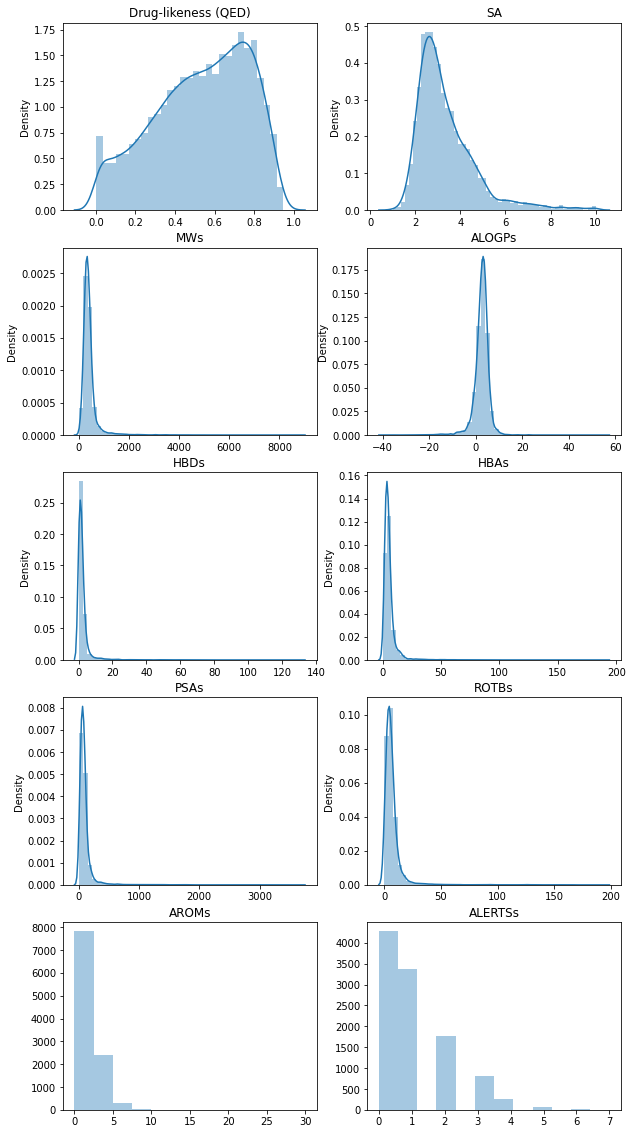

In [ ]:
smi2plots(smi_list)

In [ ]:
scores_ = processMols([Chem.MolFromSmiles(s) for s in smi_list])
